=== 1. MEMBUAT DATA CONTOH ===
Data Awal:
  Kabupaten/Kota  Tahun_2020  Tahun_2021  Tahun_2022  Tahun_2023
0        Bandung         450         480         500         520
1          Bogor         380         400         420         440
2        Cirebon         320         350         370         390
3    Tasikmalaya         280         300         320         340
4          Garut         410         430         450         470
5         Cimahi         290         310         330         350
6          Depok         520         550         580         600
7       Sukabumi         340         360         380         400
8     Majalengka         260         280         300         320
9       Sumedang         310         330         350         370


=== 2. TOTAL SAMPAH PER KAB/KOTA ===
Total dan Rata-rata Sampah:
  Kabupaten/Kota  Tahun_2020  Tahun_2021  Tahun_2022  Tahun_2023  \
0        Bandung         450         480         500         520   
1          Bogor         380         400

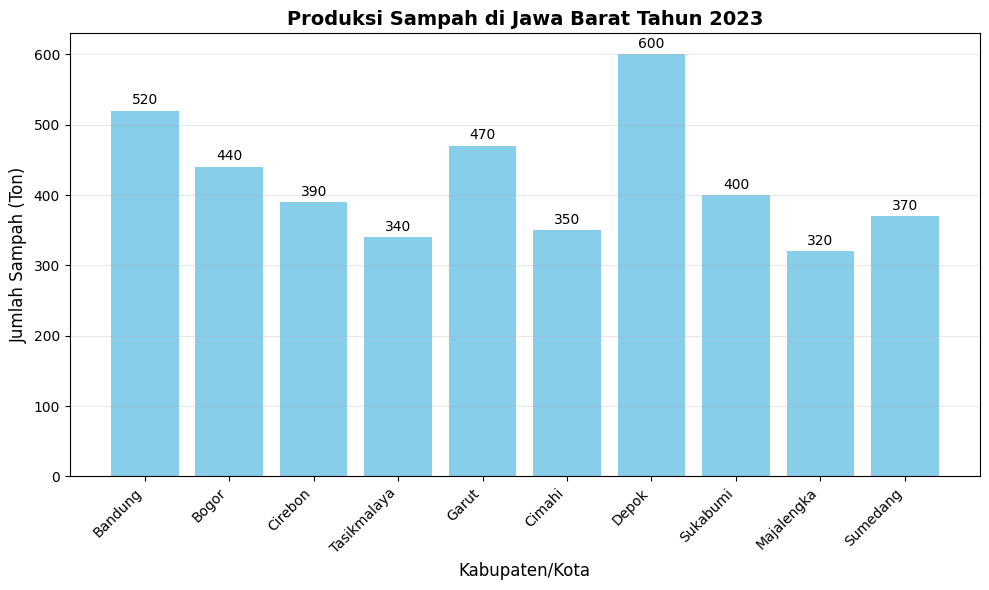

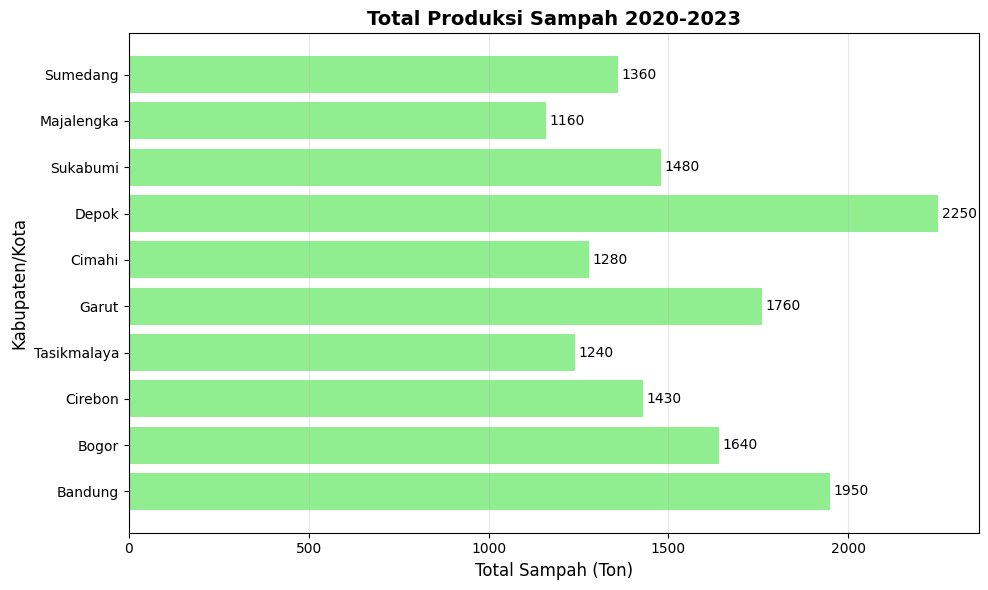


=== 4. MENAMBAHKAN KOLOM KATEGORI ===
Data dengan Kategori:
  Kabupaten/Kota  Rata_rata_Tahunan                    Kategori
0        Bandung              487.5  Harus Segera Ditanggulangi
1          Bogor              410.0  Harus Segera Ditanggulangi
2        Cirebon              357.5                        Aman
3    Tasikmalaya              310.0                        Aman
4          Garut              440.0  Harus Segera Ditanggulangi
5         Cimahi              320.0                        Aman
6          Depok              562.5  Harus Segera Ditanggulangi
7       Sukabumi              370.0                        Aman
8     Majalengka              290.0                        Aman
9       Sumedang              340.0                        Aman


=== 5. PERHITUNGAN BIAYA SAMPAH ===
Perhitungan Biaya (Rp 123.000 per ton):
  Kabupaten/Kota  Total_Sampah Biaya_Total_Formatted
0        Bandung          1950        Rp 239.850.000
1          Bogor          1640        Rp 201.720.00

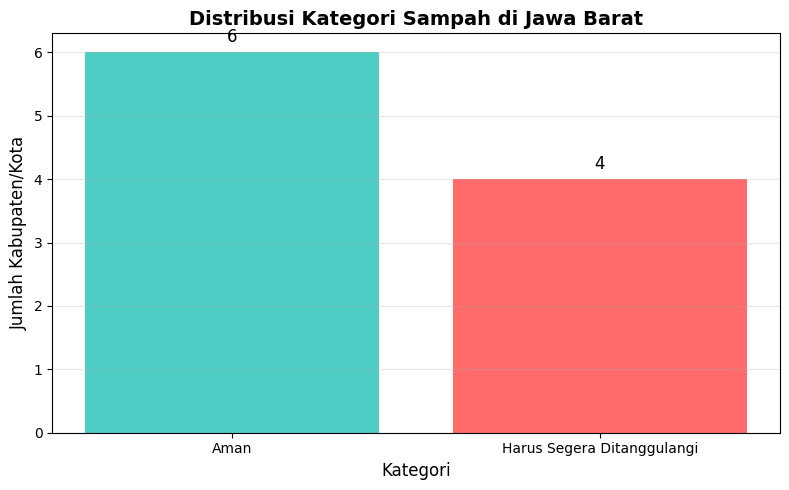


=== 8. RINGKASAN HASIL ===
Total Kabupaten/Kota            : 10
Kategori Aman                   : 6 kota
Kategori Harus Ditanggulangi    : 4 kota

Total Sampah (2020-2023)        : 15,550 ton
Total Biaya                     : Rp 1.912.650.000
Total Pajak                     : Rp 46.740.000
Total Biaya + Pajak             : Rp 1.959.390.000


In [1]:
# ===== PROGRAM LENGKAP ANALISIS SAMPAH JAWA BARAT =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== 1. MEMBUAT DATA CONTOH =====
print("=== 1. MEMBUAT DATA CONTOH ===")
data = {
    'Kabupaten/Kota': ['Bandung', 'Bogor', 'Cirebon', 'Tasikmalaya', 'Garut', 
                      'Cimahi', 'Depok', 'Sukabumi', 'Majalengka', 'Sumedang'],
    'Tahun_2020': [450, 380, 320, 280, 410, 290, 520, 340, 260, 310],
    'Tahun_2021': [480, 400, 350, 300, 430, 310, 550, 360, 280, 330],
    'Tahun_2022': [500, 420, 370, 320, 450, 330, 580, 380, 300, 350],
    'Tahun_2023': [520, 440, 390, 340, 470, 350, 600, 400, 320, 370]
}

df = pd.DataFrame(data)
print("Data Awal:")
print(df)
print("\n" + "="*50)

# ===== 2. TOTAL SAMPAH PER KAB/KOTA =====
print("\n=== 2. TOTAL SAMPAH PER KAB/KOTA ===")
df['Total_Sampah'] = df[['Tahun_2020', 'Tahun_2021', 'Tahun_2022', 'Tahun_2023']].sum(axis=1)
df['Rata_rata_Tahunan'] = df[['Tahun_2020', 'Tahun_2021', 'Tahun_2022', 'Tahun_2023']].mean(axis=1)

print("Total dan Rata-rata Sampah:")
print(df[['Kabupaten/Kota', 'Tahun_2020', 'Tahun_2021', 'Tahun_2022', 'Tahun_2023', 'Total_Sampah', 'Rata_rata_Tahunan']])
print("\n" + "="*50)

# ===== 3. GRAFIK DIAGRAM BATANG =====
print("\n=== 3. MEMBUAT GRAFIK ===")

# Grafik 1: Batang Vertikal (Tahun 2023)
plt.figure(figsize=(10, 6))
bars1 = plt.bar(df['Kabupaten/Kota'], df['Tahun_2023'], color='skyblue')
plt.title('Produksi Sampah di Jawa Barat Tahun 2023', fontsize=14, fontweight='bold')
plt.xlabel('Kabupaten/Kota', fontsize=12)
plt.ylabel('Jumlah Sampah (Ton)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Tambah nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Grafik 2: Batang Horizontal (Total Sampah)
plt.figure(figsize=(10, 6))
bars2 = plt.barh(df['Kabupaten/Kota'], df['Total_Sampah'], color='lightgreen')
plt.title('Total Produksi Sampah 2020-2023', fontsize=14, fontweight='bold')
plt.xlabel('Total Sampah (Ton)', fontsize=12)
plt.ylabel('Kabupaten/Kota', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Tambah nilai di ujung bar
for bar in bars2:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

# ===== 4. KOLOM KATEGORI =====
print("\n=== 4. MENAMBAHKAN KOLOM KATEGORI ===")
df['Kategori'] = df['Rata_rata_Tahunan'].apply(
    lambda x: 'Harus Segera Ditanggulangi' if x > 400 else 'Aman'
)

print("Data dengan Kategori:")
print(df[['Kabupaten/Kota', 'Rata_rata_Tahunan', 'Kategori']])
print("\n" + "="*50)

# ===== 5. HITUNG BIAYA SAMPAH =====
print("\n=== 5. PERHITUNGAN BIAYA SAMPAH ===")
harga_per_ton = 123000
df['Biaya_Total'] = df['Total_Sampah'] * harga_per_ton

# Format mata uang
df['Biaya_Total_Formatted'] = df['Biaya_Total'].apply(lambda x: f"Rp {x:,.0f}".replace(',', '.'))

print("Perhitungan Biaya (Rp 123.000 per ton):")
print(df[['Kabupaten/Kota', 'Total_Sampah', 'Biaya_Total_Formatted']])
print("\n" + "="*50)

# ===== 6. TAMBAH PAJAK UNTUK KATEGORI KRITIS =====
print("\n=== 6. PERHITUNGAN PAJAK 5% ===")
df['Pajak'] = 0
df['Biaya_Pajak'] = df['Biaya_Total'].copy()

for index, row in df.iterrows():
    if row['Kategori'] == 'Harus Segera Ditanggulangi':
        pajak = row['Biaya_Total'] * 0.05
        df.at[index, 'Pajak'] = pajak
        df.at[index, 'Biaya_Pajak'] = row['Biaya_Total'] + pajak

# Format hasil
df['Pajak_Formatted'] = df['Pajak'].apply(lambda x: f"Rp {x:,.0f}".replace(',', '.'))
df['Biaya_Pajak_Formatted'] = df['Biaya_Pajak'].apply(lambda x: f"Rp {x:,.0f}".replace(',', '.'))

print("Data Lengkap dengan Pajak 5% untuk Kategori Kritis:")
hasil_akhir = df[['Kabupaten/Kota', 'Rata_rata_Tahunan', 'Kategori', 
                  'Total_Sampah', 'Biaya_Total_Formatted', 
                  'Pajak_Formatted', 'Biaya_Pajak_Formatted']]
print(hasil_akhir)
print("\n" + "="*50)

# ===== 7. GRAFIK KATEGORI =====
print("\n=== 7. VISUALISASI KATEGORI ===")
plt.figure(figsize=(8, 5))
kategori_counts = df['Kategori'].value_counts()
colors = ['#FF6B6B' if x == 'Harus Segera Ditanggulangi' else '#4ECDC4' for x in kategori_counts.index]

bars3 = plt.bar(kategori_counts.index, kategori_counts.values, color=colors)
plt.title('Distribusi Kategori Sampah di Jawa Barat', fontsize=14, fontweight='bold')
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Kabupaten/Kota', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Tambah label nilai
for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             str(int(height)), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# ===== 8. RINGKASAN FINAL =====
print("\n=== 8. RINGKASAN HASIL ===")
print("="*40)
print(f"Total Kabupaten/Kota            : {len(df)}")
print(f"Kategori Aman                   : {(df['Kategori'] == 'Aman').sum()} kota")
print(f"Kategori Harus Ditanggulangi    : {(df['Kategori'] == 'Harus Segera Ditanggulangi').sum()} kota")
print(f"\nTotal Sampah (2020-2023)        : {df['Total_Sampah'].sum():,.0f} ton")
print(f"Total Biaya                     : Rp {df['Biaya_Total'].sum():,.0f}".replace(',', '.'))
print(f"Total Pajak                     : Rp {df['Pajak'].sum():,.0f}".replace(',', '.'))
print(f"Total Biaya + Pajak             : Rp {df['Biaya_Pajak'].sum():,.0f}".replace(',', '.'))
print("="*40)

# ===== 9. EKSPOR KE EXCEL (OPSIONAL) =====
# Uncomment kode di bawah untuk ekspor ke Excel
# df.to_excel('hasil_analisis_sampah_jabar.xlsx', index=False)
# print("\n✓ Data berhasil diekspor ke 'hasil_analisis_sampah_jabar.xlsx'")